# GIS con Python

##### En el presente proyecto se muestra como es que podemos transformar datos en información espacial, con un caso practico en el que se analizan los datos covid actualizados hasta la fecha 16/10/2021.   
##### Como primer paso, importamos las librerías necesarias para el proyecto

##### Pandas: Paquetería que nos permite trabajar con tablas de atributos 
##### Geopandas: Paquetería que nos permite trabajar con las geometrias 

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt 

# Importación de datos 
##### Para importar los datos aplicaremos dos métodos, uno directamente desde la página de "Datos Abiertos Dirección General de Epidemiología" y otro en el que cargamos los archivos desde la consola de comandos de anaconda 


![title](Base.png)

In [2]:
cv= pd.read_csv('211015COVID19MEXICO.csv', encoding= 'ISO-8859-1')
cv.head()

D:\Conda\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2021-10-15,z482b8,2,12,9,2,9,9,12,1,...,2,2,97,2,97,1,99,MÃ©xico,97,97
1,2021-10-15,z49a69,1,12,23,1,23,23,4,2,...,1,2,97,2,97,2,99,MÃ©xico,97,1
2,2021-10-15,z23d9d,1,12,22,2,24,22,9,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
3,2021-10-15,z24953,1,12,9,1,9,9,10,1,...,1,1,2,2,97,7,99,MÃ©xico,97,97
4,2021-10-15,zz8e77,2,12,9,2,9,9,2,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97


# Datos 

##### Mapearemos todos los datos que se tienen del covid-19 para el territorio de México, descargamos los mismos de la página de: https://www.gob.mx/salud/documentos/datos-abiertos-152127

##### Ya podemos visualizar que nuestros datos carecen de geometría, atributo que vuelve nuestra información espacial; por lo que le asignaremos dicha info. de la siguiente manera:  

# Datos Espaciales 

#### Para continuar con la asignación de datos espaciales, debemos de entrar en la pagina web de la conabio y descargar el archivo shp de la división municipal de México; en este caso descargaremos la versión 2019 ya que es la más actualizada 

http://www.conabio.gob.mx/informacion/gis/

#### Desde "anaconda prompt" se cargaron al script los archivos descargados  

In [3]:
mun= gpd.read_file('mun2019gw.shp')

#### A continuación en el grafico podemos observar que los datos efectivamente se encuentran seccionados por entidad municipal y corresponden al área geográfica de México.

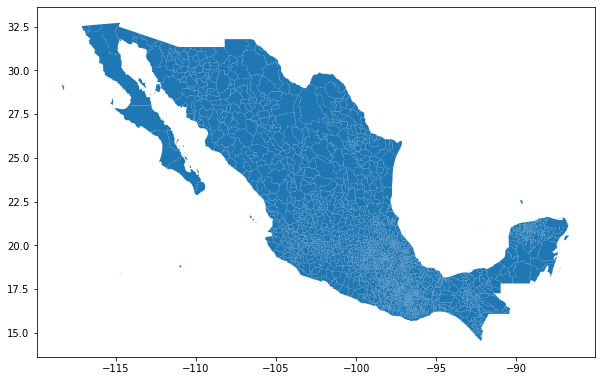

In [4]:
mun.plot(figsize=(10,10));

In [5]:
mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."


# Base de Datos Espacial

##### Ya tenemos cargados los atributos y las geometrías, lo que nos interesa es que cada geometría (polígono que define la entidad municipal) tenga su correspondiente elemento de la tabla de atributos; es decir que los datos de Aguascalientes caigan en el polígono de Aguascalientes y así sucesivamente para todos los municipios  

In [6]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11035519 entries, 0 to 11035518
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUS

In [7]:
mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CVEGEO     2483 non-null   object  
 1   CVE_ENT    2483 non-null   object  
 2   CVE_MUN    2483 non-null   object  
 3   NOM_ENT    2483 non-null   object  
 4   AREA       2483 non-null   float64 
 5   PERIMETER  2483 non-null   float64 
 6   COV_       2483 non-null   int64   
 7   COV_ID     2483 non-null   int64   
 8   NOM_MUN    2483 non-null   object  
 9   geometry   2483 non-null   geometry
dtypes: float64(2), geometry(1), int64(2), object(5)
memory usage: 194.1+ KB


# Transformar datos

#### Para poder realizar el join espacial entre atributos y geometrias, debemos de tener el mismo tipo de dato, no solo en la forma de correspondendcia tipo: Datos de Aguascalientes-Geometria de Aguascalientes.

#### Se debe tener la correspondencia "str" a "str" o en su defecto "float" a "float" por lo que transformaremos los elementos de "ENTIDAD_RES" y "MUNICIPIO_RES" a "str" mediante una lista de comprención.

In [8]:
cv['mrg']= [str(i)+'-'+str(j) for i,j in zip(cv.ENTIDAD_RES,cv.MUNICIPIO_RES)];

In [9]:
cv.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg
0,2021-10-15,z482b8,2,12,9,2,9,9,12,1,...,2,97,2,97,1,99,MÃ©xico,97,97,9-12
1,2021-10-15,z49a69,1,12,23,1,23,23,4,2,...,2,97,2,97,2,99,MÃ©xico,97,1,23-4
2,2021-10-15,z23d9d,1,12,22,2,24,22,9,1,...,2,97,2,97,6,99,MÃ©xico,97,97,22-9
3,2021-10-15,z24953,1,12,9,1,9,9,10,1,...,1,2,2,97,7,99,MÃ©xico,97,97,9-10
4,2021-10-15,zz8e77,2,12,9,2,9,9,2,1,...,2,97,2,97,6,99,MÃ©xico,97,97,9-2


In [10]:
mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."


In [11]:
mun['mrg']= [str(int(i))+'-'+str(int(j)) for i,j in zip(mun.CVE_ENT,mun.CVE_MUN)];

In [12]:
mun.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOM_ENT,AREA,PERIMETER,COV_,COV_ID,NOM_MUN,geometry,mrg
0,01001,01,001,Aguascalientes,116635.924760,256.631026,0,1,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1-1
1,01002,01,002,Aguascalientes,54337.426596,192.096428,1,2,Asientos,"POLYGON ((-102.06290 22.30175, -102.06267 22.3...",1-2
2,01003,01,003,Aguascalientes,92335.783227,171.636168,2,3,Calvillo,"POLYGON ((-102.57625 21.96778, -102.57626 21.9...",1-3
3,01004,01,004,Aguascalientes,12838.354453,73.352682,3,4,CosÃ­o,"POLYGON ((-102.25320 22.37449, -102.25320 22.3...",1-4
4,01005,01,005,Aguascalientes,49989.509147,163.500810,4,5,JesÃºs MarÃ­a,"POLYGON ((-102.31034 22.03716, -102.31034 22.0...",1-5


# Transformamos la base de datos covid en una base espacial  

In [13]:
mu= mun[['mrg','geometry']];
mu

,mrg,geometry
0,1-1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,1-2,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,1-3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,1-4,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,1-5,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."
...,...,...
2478,20-183,"POLYGON ((-98.36473 17.58262, -98.36356 17.582..."
2479,19-7,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2480,28-16,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2481,24-10,"POLYGON ((-99.63617 22.66566, -99.66599 22.675..."


In [14]:
gcv= pd.merge(cv,mu,on= 'mrg')

In [15]:
len(cv)

11035519

In [16]:
len(gcv)

11544884

In [17]:
gpd.GeoDataFrame(gcv);

### CLASIFICACION_FINAL	 nos muestra los casos positivos con la clave "3" y negativos con la clave "7"

In [18]:
%time
pos= gcv[gcv.CLASIFICACION_FINAL==3]

Wall time: 0 ns


In [19]:
pos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,mrg,geometry
4,2021-10-15,z526b3,2,12,9,1,9,9,12,1,...,97,1,1,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."
5,2021-10-15,z526b3,2,12,9,1,9,9,12,1,...,97,1,1,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.28761 19.14660, -99.29312 19.165..."
642,2021-10-15,0c0d9c,1,12,12,2,28,9,12,1,...,1,2,97,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."
643,2021-10-15,0c0d9c,1,12,12,2,28,9,12,1,...,1,2,97,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.28761 19.14660, -99.29312 19.165..."
864,2021-10-15,1df36e,1,12,9,2,15,9,12,1,...,1,2,97,3,99,MÃ©xico,97,97,9-12,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."


In [20]:
%time
pos= pos['mrg'].value_counts().reset_index()
pos.rename(columns={'index':'mrg','mrg':'cnt'},inplace=True)

Wall time: 0 ns


In [21]:
pd.merge(pos,mu,on= 'mrg')

,mrg,cnt,geometry
0,9-12,134836,"POLYGON ((-99.20575 19.30568, -99.20567 19.305..."
1,9-12,134836,"POLYGON ((-99.28761 19.14660, -99.29312 19.165..."
2,9-7,133271,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
3,22-14,127392,"POLYGON ((-100.41975 20.88999, -100.41637 20.8..."
4,22-14,127392,"POLYGON ((-100.41637 20.88890, -100.41975 20.8..."
...,...,...,...
2428,20-93,1,"POLYGON ((-97.51343 17.62906, -97.51065 17.624..."
2429,20-195,1,"POLYGON ((-97.39149 17.30827, -97.39129 17.307..."
2430,20-438,1,"POLYGON ((-96.72830 17.95832, -96.72802 17.957..."
2431,20-541,1,"POLYGON ((-96.28595 17.40930, -96.28593 17.409..."


In [22]:
pos

,mrg,cnt
0,9-12,134836
1,9-7,133271
2,22-14,127392
3,9-5,103312
4,21-114,76160
...,...,...
2410,20-93,1
2411,20-195,1
2412,20-438,1
2413,20-541,1


In [23]:
mu

,mrg,geometry
0,1-1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,1-2,"POLYGON ((-102.06290 22.30175, -102.06267 22.3..."
2,1-3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,1-4,"POLYGON ((-102.25320 22.37449, -102.25320 22.3..."
4,1-5,"POLYGON ((-102.31034 22.03716, -102.31034 22.0..."
...,...,...
2478,20-183,"POLYGON ((-98.36473 17.58262, -98.36356 17.582..."
2479,19-7,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2480,28-16,"POLYGON ((-99.62021 24.27840, -99.60523 24.308..."
2481,24-10,"POLYGON ((-99.63617 22.66566, -99.66599 22.675..."


### Graficación

In [24]:
pos= gpd.GeoDataFrame(pd.merge(pos,mu,on= 'mrg'))

In [25]:
len(pos)

2433

In [26]:
len(mu)

2483

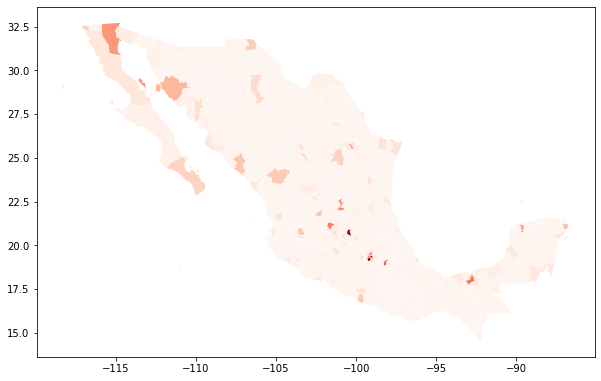

In [27]:
pos.plot('cnt',figsize=(10,10),cmap='Reds',vmin= 0, vmax=max(pos.cnt));

In [28]:
len(mun[['CVE_ENT','NOM_ENT']].drop_duplicates())

32

In [29]:
mun[['CVE_ENT','NOM_ENT']].drop_duplicates().reset_index(drop= True)

,CVE_ENT,NOM_ENT
0,01,Aguascalientes
1,02,Baja California
2,03,Baja California Sur
3,04,Campeche
4,05,Coahuila de Zaragoza
5,06,Colima
6,07,Chiapas
7,08,Chihuahua
8,09,Ciudad de MÃ©xico
9,10,Durango


In [30]:
import cartopy.crs as ccrs
from matplotlib import cm 

In [31]:
print('El minimo de casos positivos es:',min(pos.cnt))
print('El maximo de casos positivos es:',max(pos.cnt))

El minimo de casos positivos es: 1
El maximo de casos positivos es: 134836


In [32]:
neg= gpd.GeoDataFrame(mu[~mu['mrg'].isin(pos['mrg'])])

In [33]:
est= gpd.read_file('Estados/dest2019gw.shp')

Wall time: 0 ns


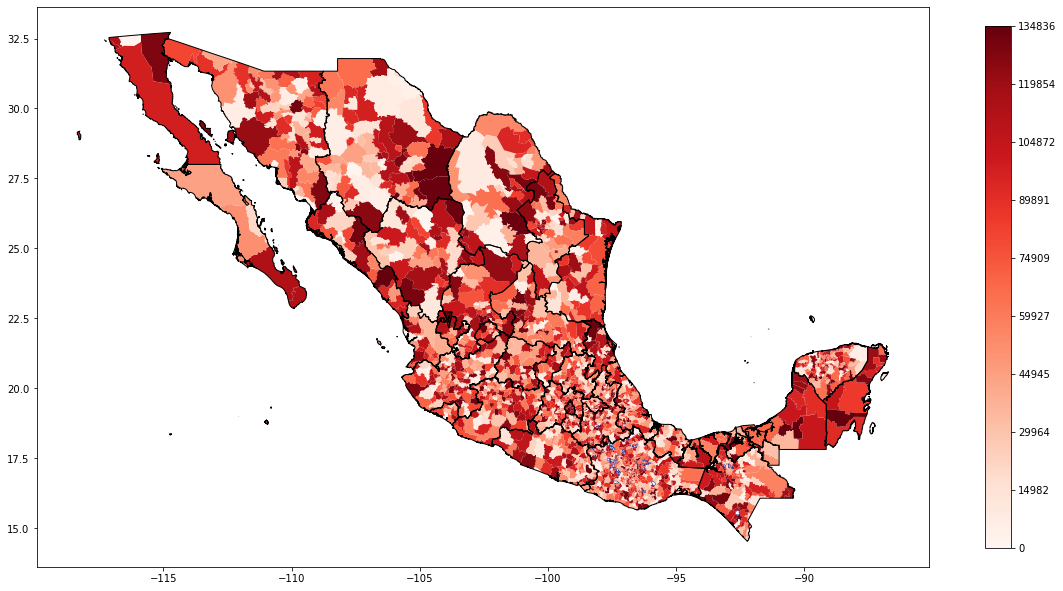

In [34]:
%time
norm= cm.colors.Normalize(vmin=0,vmax=max(pos.cnt))
cmap= cm.Reds
ax= pos.plot(figsize=(20,20),cmap=cmap.reversed(),vmin= 0, vmax=max(pos.cnt));
neg.plot(ax=ax,color='white',ec='#2B3490',linewidth=0.5)
est.boundary.plot(ax=ax,linewidth=1,ec='k')
ticks= np.linspace(0,max(pos.cnt),10)
plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink= 0.48,ticks=ticks);
# plt.savefig('ActMME.png',dpi=300,bbox_inches='tight');

In [35]:
# neg.plot();

In [48]:
# ax= est.boundary.plot(linewidth=1,ec='g',figsize=(20,20))
# pos.centroid.plot(ax=ax,markersize=pos.cnt,alpha=0.02,color='green')

In [50]:
# est.crs

In [38]:
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.colors import ListedColormap
from matplotlib.offsetbox import AnchoredText
from datetime import date 

Wall time: 0 ns


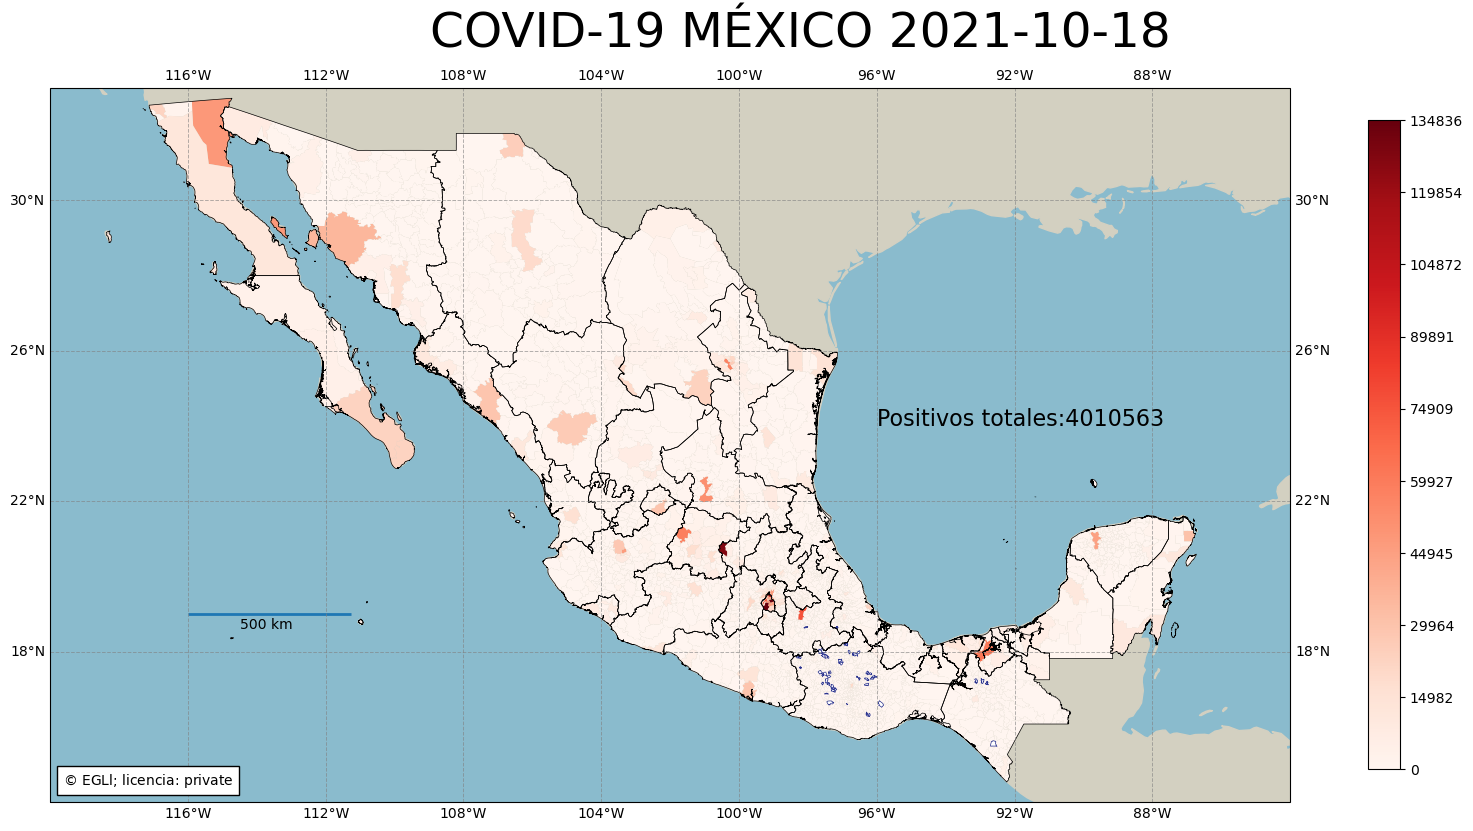

In [45]:
%time
plt.figure(dpi=100,figsize=(20,20))
norm= cm.colors.Normalize(vmin=0,vmax=max(pos.cnt))
cmap= cm.Reds
ax= plt.axes(projection=ccrs.PlateCarree())
ext= [-120,-84,14,33]
ax.set_extent(ext,crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN,facecolor='#8ABBCD')
ax.add_feature(cfeature.LAND,facecolor='#D3D0c1')
pos.plot('cnt',ax=ax,cmap=cmap,vmin= 0, vmax=max(pos.cnt));
neg.plot(ax=ax,color='white',ec='#2B3490',linewidth=0.5)
est.boundary.plot(ax=ax,linewidth=0.5,ec='k')
ticks= np.linspace(0,max(pos.cnt),10)
plt.colorbar(cm.ScalarMappable(norm=norm,cmap=cmap),ax=ax,shrink= 0.43,ticks=ticks);
gl= ax.gridlines(crs= ccrs.PlateCarree(),draw_labels=True,linewidth=0.7,color='gray',alpha=0.6,linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlocator = mticker.FixedLocator(np.arange(ext[0], ext[1]+4,4))
gl.ylocator = mticker.FixedLocator(np.arange(ext[2],ext[3]+4,4))
plt.suptitle('COVID-19 MÉXICO '+date.today().isoformat(),fontsize=35,y=0.72)
source= 'EGLl'
license= 'private'
text= AnchoredText('$\copyright$ {}; licencia: {}'.format(source,license),loc=3,prop={'size':10},frameon=True)
ax.add_artist(text)
plt.text(-96,24,'Positivos totales:'+str(np.sum(pos.cnt)),fontsize=16);
x1=-116
x2=-111.27
plt.hlines(19,x1,x2,linewidth=2)
plt.text(-114.5,18.6,'500 km');
# plt.savefig('ProductoFinal.png',dpi=300,bbox_inches='tight');

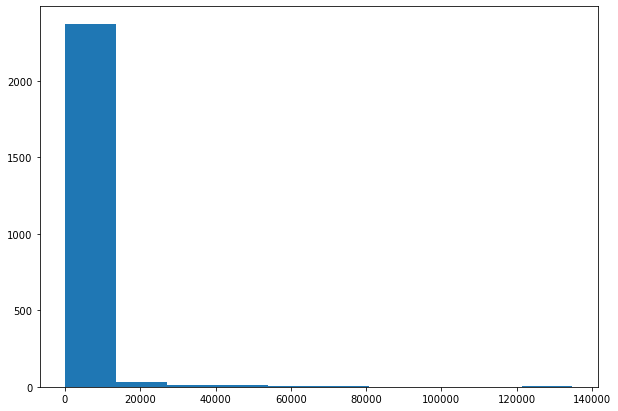

In [46]:
# plt.figure(figsize=(10,7));
# plt.hist(pos.cnt);

In [41]:
# !pip install geopy;

In [42]:
from geopy.distance import geodesic

In [43]:
# p1=(18,-116)
# p2=(18,-111.27)
# geodesic(p1,p2).km